In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries to verify installation
import seaborn as sns
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/drive/MyDrive/DataSet/'

In [ ]:
path = ""

# DATA SET

In [ ]:
df = pd.read_csv(data_path + 'data.csv')

In [ ]:
print(df.shape)
df.head()

(5000000, 20)


,timestamp,aimp,amud,arnd,asin1,asin2,adbr,adfl,bed1,bed2,bfo1,bfo2,bso1,bso2,bso3,ced1,cfo1,cso1,y,category
0,2023-01-01 00:00:00,0.0,1.0,20.000000,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,2023-01-01 00:00:01,0.0,1.0,20.080031,0.00002,0.0002,0.0,0.0,0.0,0.0,0.0,4.993912e-07,0.000789,0.0,0.0,0.0,0.000021,0.001229,0.0,0.0
2,2023-01-01 00:00:02,0.0,1.0,20.276562,0.00004,0.0004,0.0,0.0,0.0,0.0,0.0,1.496957e-06,0.003115,0.0,0.0,0.0,0.000104,0.004833,0.0,0.0
3,2023-01-01 00:00:03,0.0,1.0,20.730938,0.00006,0.0006,0.0,0.0,0.0,0.0,0.0,2.991484e-06,0.006914,0.0,0.0,0.0,0.000285,0.010688,0.0,0.0
4,2023-01-01 00:00:04,0.0,1.0,21.118101,0.00008,0.0008,0.0,0.0,0.0,0.0,0.0,4.981761e-06,0.012123,0.0,0.0,0.0,0.000601,0.018669,0.0,0.0


In [ ]:
df = df.drop('timestamp', axis = 1)

# EDA

In [ ]:
# split the data into x and y dataframes

X_df = df.drop('y', axis=1)
X_df = X_df.drop('category', axis=1)
y_df = df['y']

In [ ]:
print(X_df.shape)
X_df.head()

(5000000, 17)


,aimp,amud,arnd,asin1,asin2,adbr,adfl,bed1,bed2,bfo1,bfo2,bso1,bso2,bso3,ced1,cfo1,cso1
0,0.0,1.0,20.000000,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,1.0,20.080031,0.00002,0.0002,0.0,0.0,0.0,0.0,0.0,4.993912e-07,0.000789,0.0,0.0,0.0,0.000021,0.001229
2,0.0,1.0,20.276562,0.00004,0.0004,0.0,0.0,0.0,0.0,0.0,1.496957e-06,0.003115,0.0,0.0,0.0,0.000104,0.004833
3,0.0,1.0,20.730938,0.00006,0.0006,0.0,0.0,0.0,0.0,0.0,2.991484e-06,0.006914,0.0,0.0,0.0,0.000285,0.010688
4,0.0,1.0,21.118101,0.00008,0.0008,0.0,0.0,0.0,0.0,0.0,4.981761e-06,0.012123,0.0,0.0,0.0,0.000601,0.018669


In [ ]:
print(y_df.shape)
y_df.head()

(5000000,)


,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
# check for missing values

df.isnull().sum()

,0
aimp,0
amud,0
arnd,0
asin1,0
asin2,0
adbr,0
adfl,0
bed1,0
bed2,0
bfo1,0


In [ ]:
# load metadata csv

df_metadata = pd.read_csv(data_path + 'metadata.csv')

In [ ]:
print(df_metadata.shape)
df_metadata.head()

(200, 5)


,start_time,end_time,root_cause,affected,category
0,2023-01-12 15:11:45,2023-01-12 15:20:05,bso3,['cfo1'],12
1,2023-01-12 16:27:46,2023-01-12 17:51:06,bso3,['cfo1'],1
2,2023-01-12 18:19:35,2023-01-12 18:36:15,bfo2,['cso1'],8
3,2023-01-12 20:46:32,2023-01-12 20:51:32,bed2,['ced1'],7
4,2023-01-13 05:57:10,2023-01-13 06:02:10,bfo1,['cfo1'],9


In [ ]:
df_metadata.category.value_counts()

,count
category,
8,28
3,22
12,20
7,20
9,18
4,15
5,13
2,13
6,12


From the metadata, we can see that we have 200 batches of injected anomalies. And, in each batch, we can see the root cause of the anomaly.

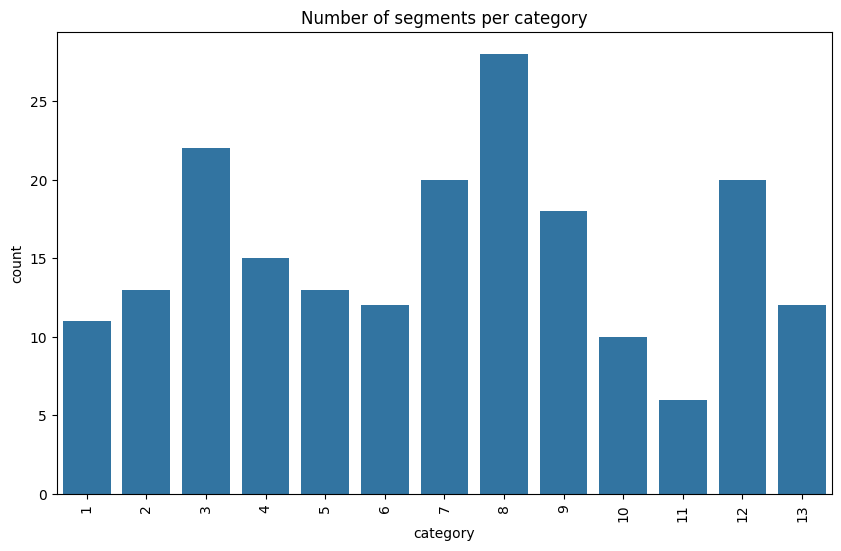

In [ ]:
# Plot graph of categories

plt.figure(figsize=(10,6))

sns.countplot(x='category', data=df_metadata)

plt.title('Number of segments per category')

plt.xticks(rotation=90)

plt.show()

In [ ]:
  # check for class imbalance

y_df.value_counts()

,count
y,
0.0,4809900
1.0,190100


In [ ]:
# check for labels in first 1000000 rows

y_df[:1000000].value_counts()

,count
y,
0.0,1000000


In [ ]:
y_df[1000000:].value_counts()

,count
y,
0.0,3809900
1.0,190100


In [ ]:
# Get summary statistics for the features
X_df.describe()


,aimp,amud,arnd,asin1,asin2,adbr,adfl,bed1,bed2,bfo1,bfo2,bso1,bso2,bso3,ced1,cfo1,cso1
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.004660e-02,-2.063128e+00,2.037560e+01,1.376862e-03,4.375382e-04,5.014428e-01,6.047880e-01,1.006633e+00,2.009579e-01,1.027840e+01,4.531630e+01,-2.036999e+00,6.065850e-01,3.043164e-01,3.832717e+02,-9.272158e+00,4.385963e+01
std,9.972797e-02,1.247662e+01,1.003736e+01,7.086476e-01,7.069422e-01,4.999980e-01,4.888962e-01,7.204717e-01,3.226495e-01,1.091826e+01,1.500953e+01,1.260142e+01,6.998044e-01,1.086660e-01,1.527735e+02,1.596908e+01,1.813677e+01
min,0.000000e+00,-4.700000e+01,1.000000e+01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-8.488071e+00,-4.675346e+00,-1.175588e+02,-1.720937e+02,-8.956028e+01,-1.126187e+01,-1.456883e+00,-8.080388e+02,-1.560371e+02,-2.030314e+02
25%,0.000000e+00,-7.000000e+00,1.246351e+01,-7.100338e-01,-7.065659e-01,0.000000e+00,0.000000e+00,4.508830e-01,1.047451e-03,8.006783e-01,3.678116e+01,-7.421050e+00,1.709159e-02,2.326239e-01,2.815484e+02,-1.847354e+01,3.288450e+01
50%,0.000000e+00,0.000000e+00,1.683966e+01,8.296232e-03,1.525203e-03,1.000000e+00,1.000000e+00,8.957148e-01,3.490144e-02,8.445810e+00,4.535635e+01,-7.221989e-01,7.062810e-01,3.018725e-01,3.676660e+02,-7.354781e+00,4.383317e+01
75%,0.000000e+00,5.000000e+00,2.549316e+01,7.100337e-01,7.069845e-01,1.000000e+00,1.000000e+00,1.415038e+00,2.756596e-01,1.519138e+01,5.393373e+01,4.744535e+00,1.135538e+00,3.729177e-01,4.667581e+02,1.262402e+00,5.502822e+01
max,1.000000e+00,3.700000e+01,5.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.677479e+01,1.014906e+01,7.803936e+02,1.306257e+03,1.290254e+02,3.451370e+01,8.804988e+00,6.354198e+03,1.275665e+02,2.961996e+02


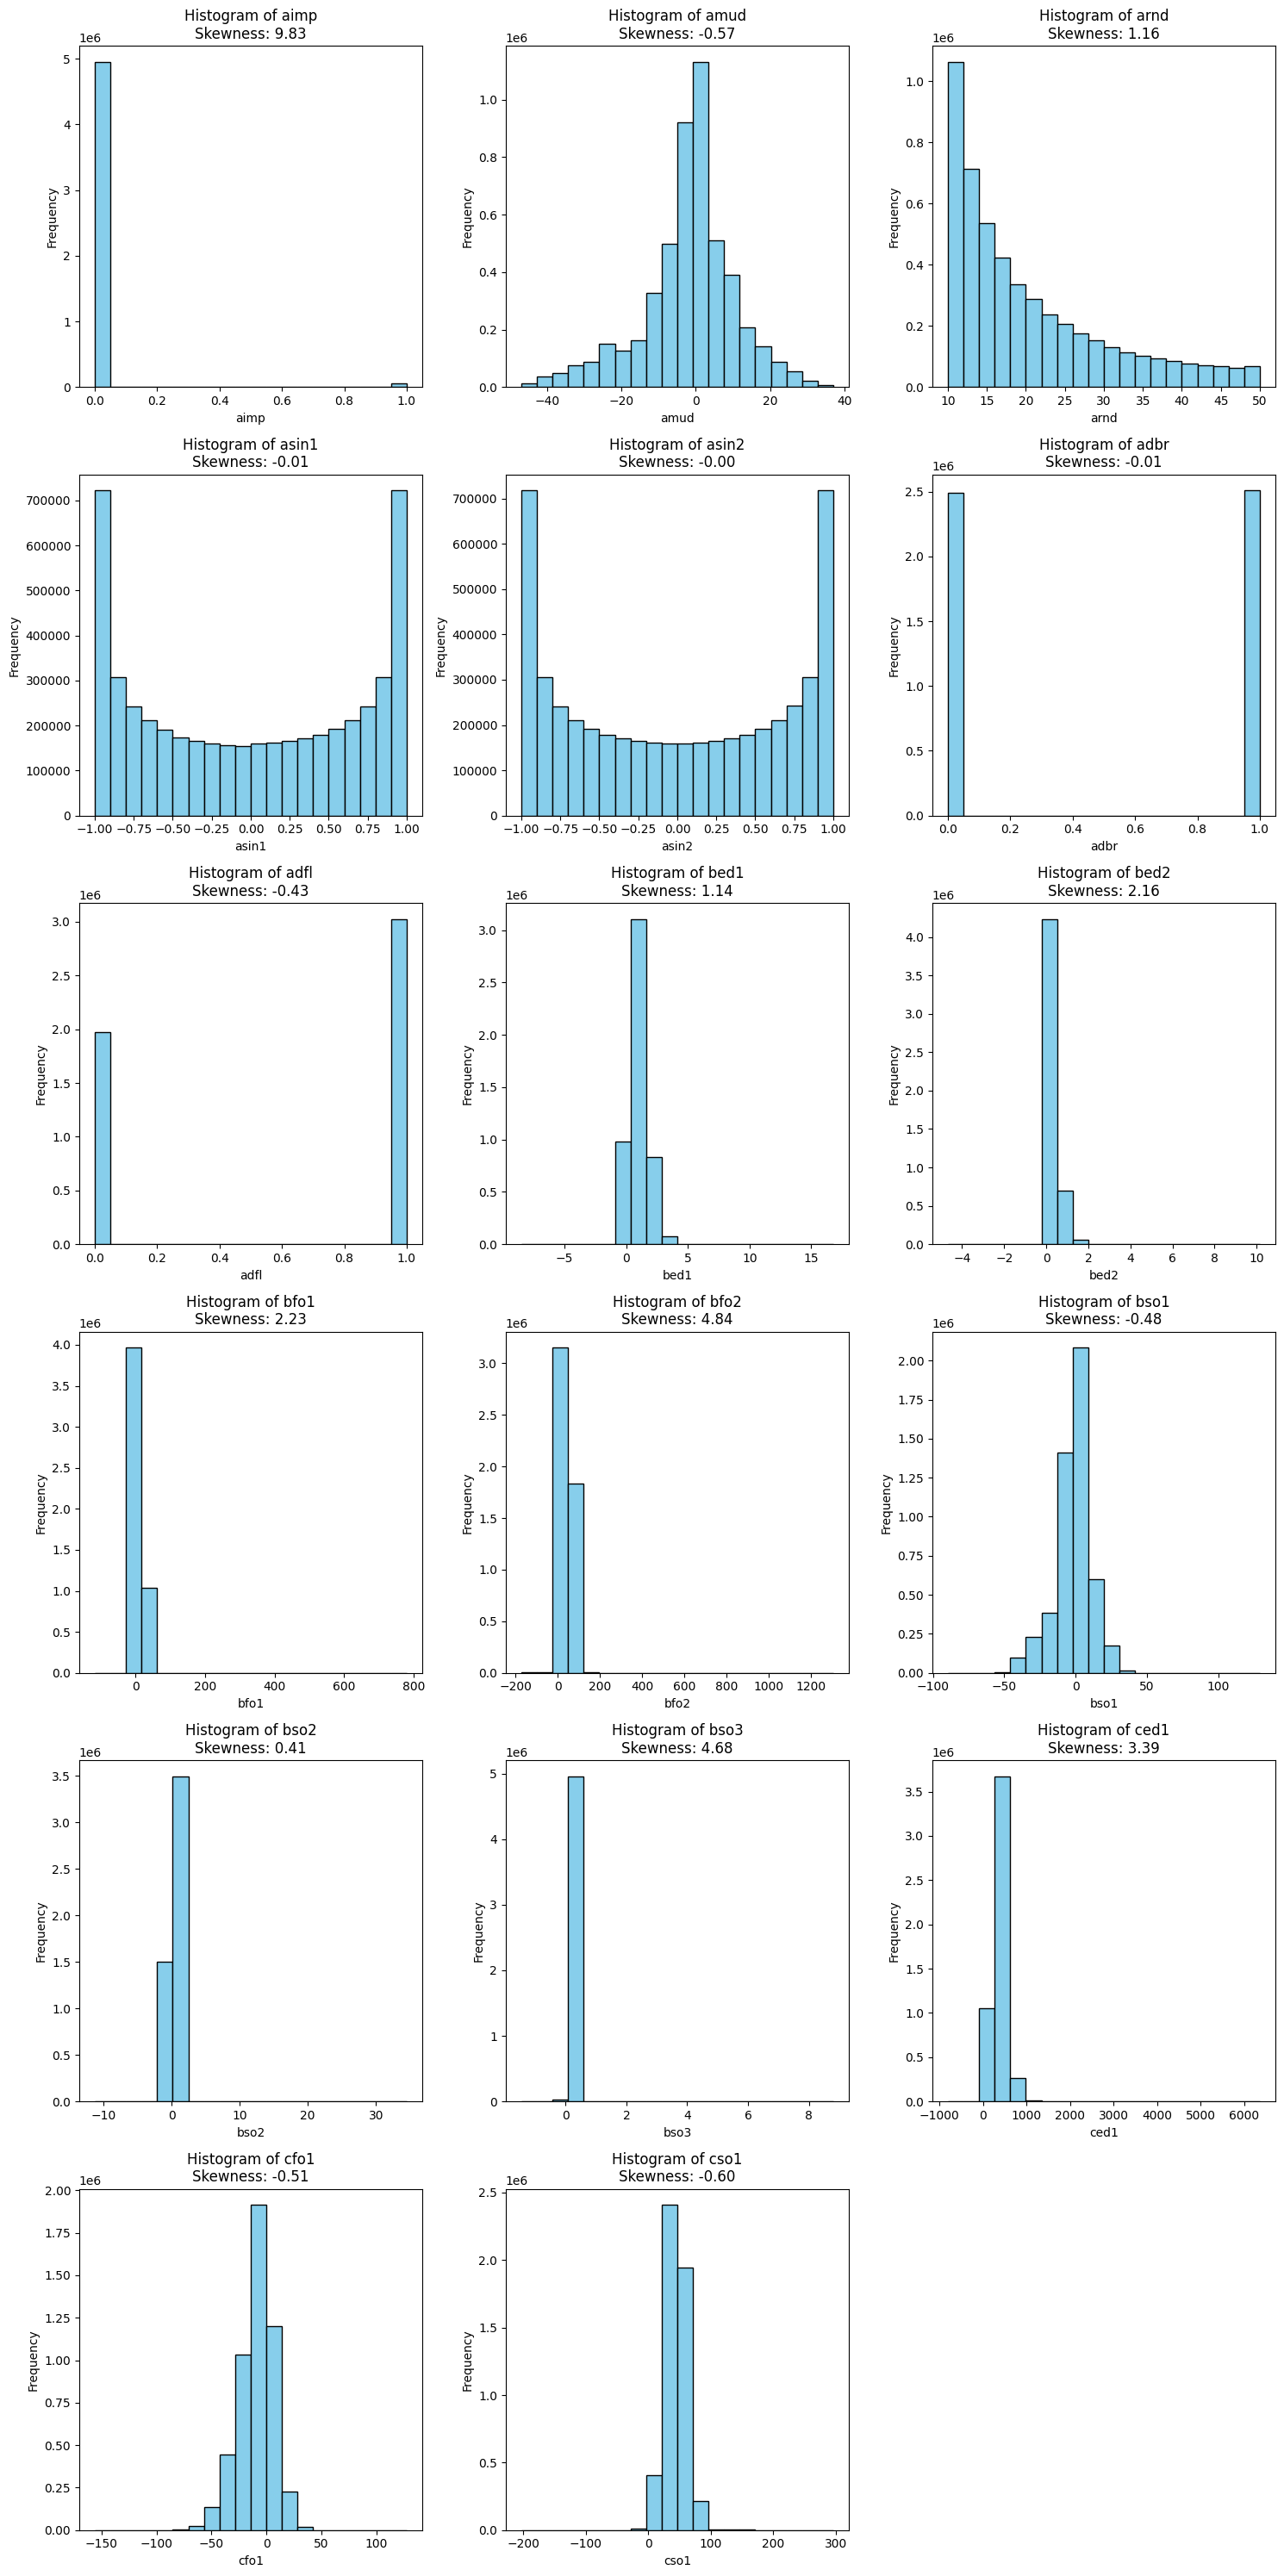

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Ensure numeric features are selected correctly
numeric_features = X_df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_features.columns

# Determine the number of subplots needed
num_plots = len(numeric_columns)
num_rows = int(np.ceil(num_plots / 3))  # Calculate number of rows based on 3 columns per row

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))  # Create subplots

axes = axes.flatten()  # Flatten axes array for easy indexing

# Loop through numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    axes[i].hist(X_df[column], bins=20, color='skyblue', edgecolor='black')  # Adjust bins if necessary
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}\nSkewness: {skew(X_df[column]):.2f}')  # Calculate skewness

# Remove any extra subplots (if num_plots is not a multiple of 3)
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
# check the features for which number of unique values is small

discrete_features = [feature for feature in numeric_columns if len(X_df[feature].unique()) < 100]

for feature in discrete_features:
    print(f'{feature}: {X_df[feature].unique()}')

aimp: [0. 1.]
amud: [  1.  -1.   2.   3.   6.   5.   0.  10.   7.   4.  -4.   9.  11.   8.
  16.  12.  -3.  -6.  -5. -12. -13.  -7.  -9.  -2. -10. -11.  -8. -15.
 -14. -17. -19. -21. -24. -23. -22. -25. -28. -16. -20. -30. -29. -26.
 -27. -32. -31. -34. -37. -35. -18.  13.  15.  14.  18.  21.  22.  25.
  26.  30.  27.  24.  23.  29.  28.  20.  19.  17. -33. -41. -38. -39.
 -44. -45. -36. -40. -43. -46. -42. -47.  31.  32.  33.  34.  37.  36.
  35.]
adbr: [0. 1.]
adfl: [0. 1.]


From this, we gathered that other than category, we have 4 features which have discrete values. Therefore, we make sure not to normalize these features (we only want to normalize the continuous features)

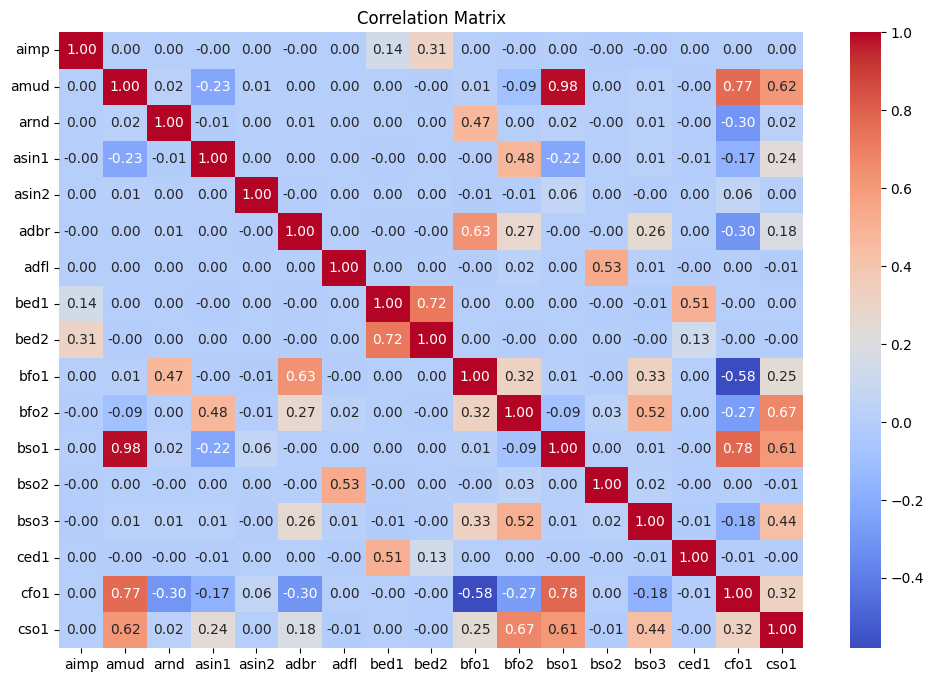

In [ ]:
# Compute the correlation matrix
corr_matrix = X_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


# Data Preprocessing

We implement K fold time series split to ensure that the model is trained on the past and tested on the future. This is important as we are dealing with time series data.

Data preprocessing steps:
- Normalizing the continuous features
- Dropping highly correlated features (if any)
- Data augmentation on training sets

In [ ]:
!pip install imbalanced-learn


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Define the number of splits
n_splits = 3

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Perform the splits
fold = 0
for train_index, test_index in tscv.split(X_df):
    fold += 1
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    print(f"Fold {fold}")
    print(f"TRAIN indices: {train_index}")
    print(f"TEST indices: {test_index}")

Fold 1
TRAIN indices: [      0       1       2 ... 1249997 1249998 1249999]
TEST indices: [1250000 1250001 1250002 ... 2499997 2499998 2499999]
Fold 2
TRAIN indices: [      0       1       2 ... 2499997 2499998 2499999]
TEST indices: [2500000 2500001 2500002 ... 3749997 3749998 3749999]
Fold 3
TRAIN indices: [      0       1       2 ... 3749997 3749998 3749999]
TEST indices: [3750000 3750001 3750002 ... 4999997 4999998 4999999]


In [ ]:
# get contamination rates of train and test sets of all folds

contamination_rates = {}

for train_index, test_index in tscv.split(X_df):
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    train_contamination_rate = np.mean(y_train)
    test_contamination_rate = np.mean(y_test)
    contamination_rates[f"Fold {len(contamination_rates)+1}"] = {
        "Train": train_contamination_rate,
        "Test": test_contamination_rate
    }

contamination_rates

{'Fold 1': {'Train': 0.0152, 'Test': 0.04632},
 'Fold 2': {'Train': 0.03076, 'Test': 0.04344},
 'Fold 3': {'Train': 0.034986666666666666, 'Test': 0.04712}}

Correlation Analysis

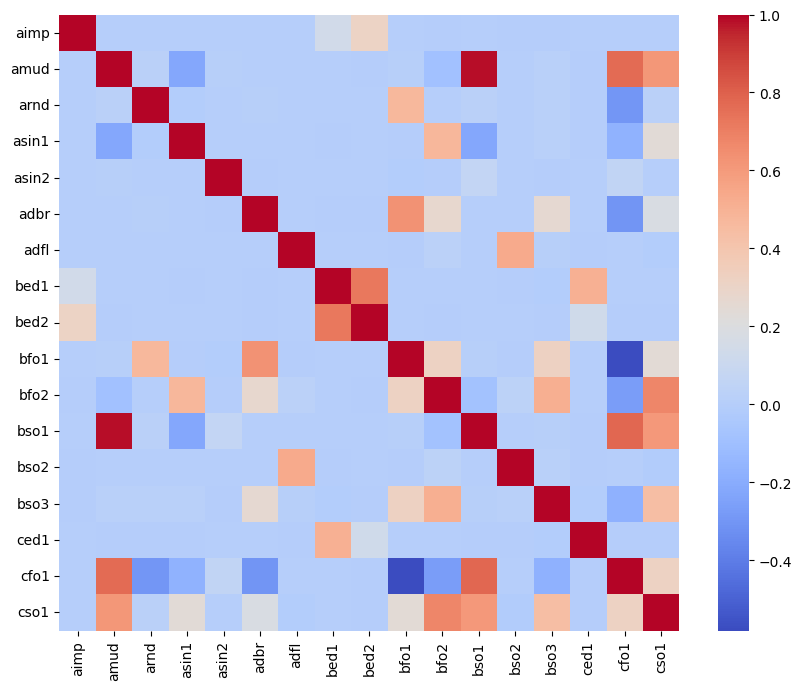

In [ ]:
# check for correlation matrix between columns, using sns heatmap

corr = X_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linecolor='black')
plt.show()

In [ ]:
def preprocess_data(X_train, X_test, y_train=None, y_test=None, correlation_threshold=0.9):
    """
    Preprocess the data by scaling features, handling missing values, and dropping highly correlated features.

    Parameters:
    X_train (DataFrame): Training feature set.
    X_test (DataFrame): Test feature set.
    y_train (Series, optional): Training labels.
    y_test (Series, optional): Test labels.
    correlation_threshold (float): Threshold for dropping highly correlated features.

    Returns:
    X_train_scaled, X_test_scaled: Scaled and preprocessed training and test feature sets.
    """

    # Drop highly correlated features in the training set, display highly correlated features
    corr_matrix_train = X_train.corr().abs()
    upper = corr_matrix_train.where(np.triu(np.ones(corr_matrix_train.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    print(f"Highly correlated features to drop for train set: {to_drop}")
    X_train_reduced = X_train.drop(columns=to_drop)

    corr_matrix_test = X_test.corr().abs()
    upper = corr_matrix_test.where(np.triu(np.ones(corr_matrix_test.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    print(f"Highly correlated features to drop for test set: {to_drop}")
    X_test_reduced = X_test.drop(columns=to_drop)

    numeric_features = X_train_reduced.select_dtypes(include=['float64', 'int64'])  # Select numeric features
    numeric_columns = numeric_features.columns
    discrete_features = [feature for feature in numeric_columns if len(X_df[feature].unique()) < 100]
    continuous_features = [feature for feature in numeric_columns if feature not in discrete_features]

    scaler = StandardScaler()
    X_train_scaled = X_train_reduced.copy()
    X_train_scaled[continuous_features] = scaler.fit_transform(X_train_reduced[continuous_features])
    X_test_scaled = X_test_reduced.copy()
    X_test_scaled[continuous_features] = scaler.transform(X_test_reduced[continuous_features])

    return X_train_scaled, X_test_scaled

Now our dataset is standardized, with highly correlated features dropped, we can proceed with data augmentation on the train set. We will use the SMOTE technique to balance the dataset.
This represents a very imbalanced dataset, with the majority class being the normal data. So, clearly, data augmentation is necessary.

In [ ]:
from imblearn.over_sampling import SMOTE
def augment_data(X_train, y_train):
    """
    Augment the training data using SMOTE.

    Parameters:
    X_train (array-like): Training feature set.
    y_train (array-like): Training labels.

    Returns:
    X_train_resampled, y_train_resampled: Augmented training feature set and labels.
    """
    if len(np.unique(y_train)) > 1:  # Check if there is more than one class
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        return X_train_resampled, y_train_resampled
    else:
        # If there's only one class, return the original data
        print("SMOTE not applied, only one class present.")
        return X_train, y_train

In [ ]:
# Preprocess and augment the data for each fold
X_train_scaled, X_test_scaled = {}, {}
y_train_scaled, y_test_scaled = {}, {}
X_train_augmented, y_train_augmented = {}, {}

for fold, (train_index, test_index) in enumerate(tscv.split(X_df)):
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Preprocess the data
    X_train_scaled[fold], X_test_scaled[fold] = preprocess_data(X_train, X_test, y_train, y_test)
    y_train_scaled[fold], y_test_scaled[fold] = y_train, y_test

    print(f"Fold {fold} preprocessing complete")
    print(X_train_scaled[fold].shape)
    print(X_test_scaled[fold].shape)

    # Augment the training data
    X_train_augmented[fold], y_train_augmented[fold] = augment_data(X_train_scaled[fold], y_train_scaled[fold])

    # Print shapes of the augmented training data
    print(f"Fold {fold} augmentation complete")
    print(f"Augmented Train Data Shape: {X_train_augmented[fold].shape}")
    print(f"Augmented Train Labels Shape: {y_train_augmented[fold].shape}")
    print("\n")

Highly correlated features to drop for train set: ['bso1']
Highly correlated features to drop for test set: ['bso1']
Fold 0 preprocessing complete
(1250000, 16)
(1250000, 16)
Fold 0 augmentation complete
Augmented Train Data Shape: (2462000, 16)
Augmented Train Labels Shape: (2462000,)


Highly correlated features to drop for train set: ['bso1']
Highly correlated features to drop for test set: ['bso1']
Fold 1 preprocessing complete
(2500000, 16)
(1250000, 16)
Fold 1 augmentation complete
Augmented Train Data Shape: (4846200, 16)
Augmented Train Labels Shape: (4846200,)


Highly correlated features to drop for train set: ['bso1']
Highly correlated features to drop for test set: ['bso1']
Fold 2 preprocessing complete
(3750000, 16)
(1250000, 16)
Fold 2 augmentation complete
Augmented Train Data Shape: (7237600, 16)
Augmented Train Labels Shape: (7237600,)




In [ ]:
X_train = X_train_augmented
y_train = y_train_augmented

X_test = X_test_scaled
y_test = y_test_scaled

In [ ]:
import numpy as np
import pandas as pd

def create_windows_optimized(data, labels, window_size, step_size=1):
    """
    Create overlapping windows from the time series data using efficient numpy operations.

    Parameters:
    data (DataFrame or ndarray): The input features (e.g., preprocessed time series data).
    labels (Series or ndarray): The corresponding labels for the data.
    window_size (int): The size of each window.
    step_size (int): The step size for moving the window.

    Returns:
    X_windows (ndarray): 3D array of shape (num_samples, window_size, num_features).
    y_windows (ndarray): 1D array of labels corresponding to each window.
    """
    # Convert DataFrame/Series to numpy arrays if necessary
    if isinstance(data, pd.DataFrame):
        data = data.values
    if isinstance(labels, pd.Series):
        labels = labels.values

    n_samples, n_features = data.shape
    num_windows = (n_samples - window_size) // step_size + 1

    # Create sliding windows using np.lib.stride_tricks for efficiency
    X_windows = np.lib.stride_tricks.sliding_window_view(data, (window_size, n_features))[::step_size, 0, :, :]

    # Extract corresponding labels (last time step in each window)
    y_windows = labels[window_size-1::step_size]

    return X_windows, y_windows

# Define window size and step size
window_size = 50  # Example window size (adjust as needed)
step_size = 1     # Example step size (can also be adjusted)

# Create windows for each fold of augmented training data
X_train_windows = {}
y_train_windows = {}

for fold in range(n_splits):
    # Use augmented training data for windowing
    X_train_aug = pd.DataFrame(X_train_augmented[fold])  # Convert to DataFrame if necessary
    y_train_aug = pd.Series(y_train_augmented[fold])      # Convert to Series if necessary

    # Create windows using optimized function
    X_train_windows[fold], y_train_windows[fold] = create_windows_optimized(X_train_aug, y_train_aug, window_size, step_size)

    # Print shapes of the windowed data
    print(f"Fold {fold} windowing complete")
    print(f"Windowed Train Data Shape: {X_train_windows[fold].shape}")
    print(f"Windowed Train Labels Shape: {y_train_windows[fold].shape}")


Fold 0 windowing complete
Windowed Train Data Shape: (2461951, 50, 16)
Windowed Train Labels Shape: (2461951,)
Fold 1 windowing complete
Windowed Train Data Shape: (4846151, 50, 16)
Windowed Train Labels Shape: (4846151,)
Fold 2 windowing complete
Windowed Train Data Shape: (7237551, 50, 16)
Windowed Train Labels Shape: (7237551,)


After preprocessing the data and applying windowing, we obtain the following shapes for the input and output data:

1. Input Data:
   - The windowed training data for each fold has a shape of `(num_samples, window_size, num_features)`, where:
     - `num_samples`: The number of windowed samples generated from the original dataset.
     - `window_size`: The length of each window, which is set to 50 in this case.
     - `num_features`: The number of features in the dataset, which is 16.

   For example, for Fold 0:
   - Shape: `(2461951, 50, 16)`

2. Output Data:
   - The windowed training labels correspond to each input sample and have a shape of `(num_samples,)`, where `num_samples` is the number of windowed samples.

   For example, for Fold 0:
   - Shape: `(2461951,)`




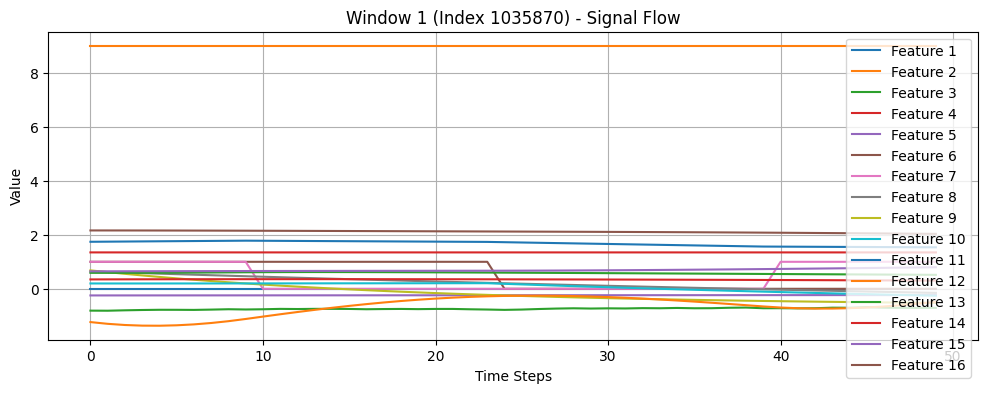

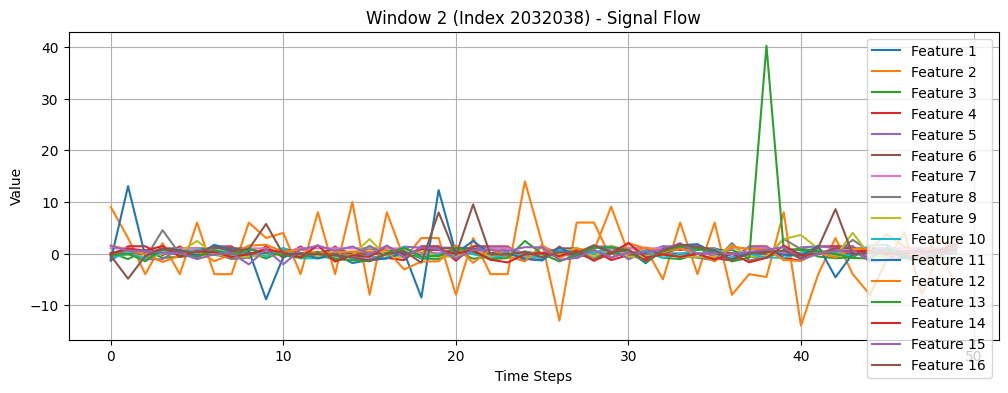

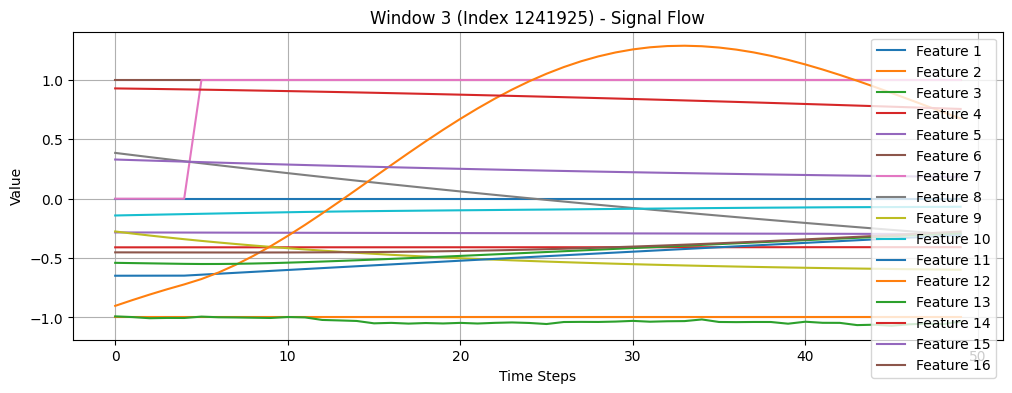

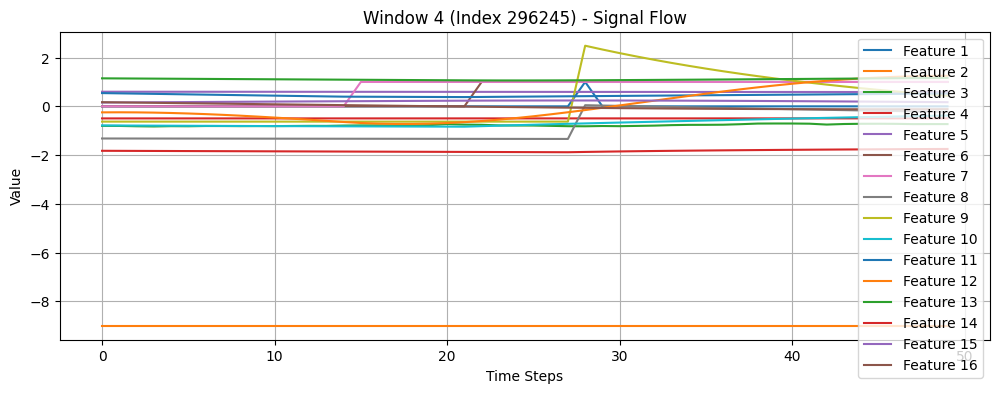

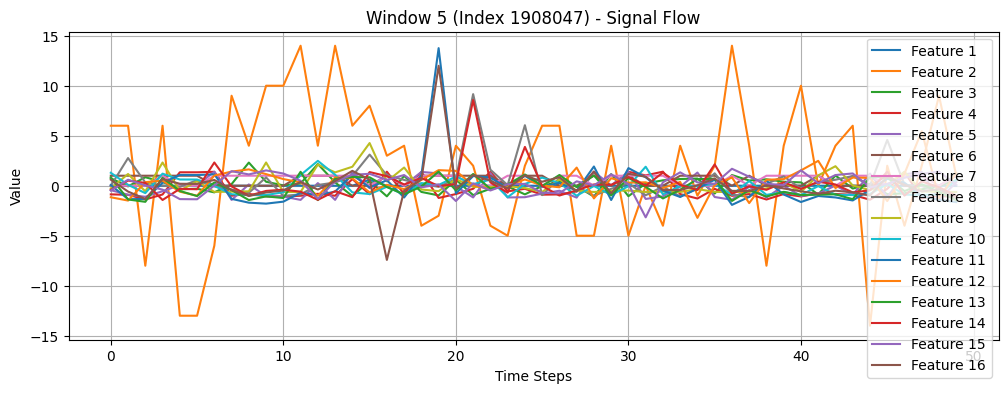

In [ ]:
import matplotlib.pyplot as plt
import random

def plot_random_windows(X_windows, n_windows=10):
    """
    Plot random windows from the windowed data to visualize the signal flow.

    Parameters:
    X_windows (ndarray): The windowed input data.
    n_windows (int): Number of random windows to plot.
    """
    n_features = X_windows.shape[2]

    # Select random indices to plot
    random_indices = random.sample(range(X_windows.shape[0]), n_windows)

    # Plot each selected window
    for i, idx in enumerate(random_indices):
        plt.figure(figsize=(12, 4))
        for feature in range(n_features):
            plt.plot(X_windows[idx, :, feature], label=f'Feature {feature+1}')
        plt.title(f"Window {i+1} (Index {idx}) - Signal Flow")
        plt.xlabel("Time Steps")
        plt.ylabel("Value")
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming X_train_windows[fold] contains windowed data
fold = 0  # Choose any fold you want to visualize
plot_random_windows(X_train_windows[fold], n_windows=5)  # Plot 5 random windows


# Transformer-LSTM model

This project utilizes a hybrid Transformer-LSTM model to detect anomalies within the Controlled Anomalies Time Series (CATS) dataset. The model leverages the Transformer’s attention mechanism to capture long-range dependencies and an LSTM layer to capture sequential patterns, effectively handling temporal relationships in time series data.

In [ ]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Libraries for evaluation metrics and model building
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, Dropout, LayerNormalization, Add
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score


Model Definition - Transformer-LSTM Hybrid Model
The model architecture combines a Transformer block to capture inter-feature dependencies with an LSTM layer to manage temporal sequences, ending with a dense layer for binary classification (anomaly or normal).

In [ ]:
def transformer_with_lstm(input_shape, num_heads=4, dff=128, lstm_units=64, dropout_rate=0.1):
    """
    Build a Transformer + LSTM model for anomaly detection in time series.

    Parameters:
    - input_shape: tuple, the shape of the input data (sequence length, num_features)
    - num_heads: int, number of attention heads in the Transformer
    - dff: int, dimensionality of the dense feed-forward network in Transformer
    - lstm_units: int, number of LSTM units
    - dropout_rate: float, dropout rate for regularization

    Returns:
    - model: Compiled Keras model with 'binary_crossentropy' loss and 'accuracy' metric
    """
    inputs = Input(shape=input_shape)

    # Transformer Block
    x = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(inputs, inputs)
    x = Dropout(dropout_rate)(x)
    x = Add()([inputs, x])
    x = LayerNormalization(epsilon=1e-6)(x)

    # Feed-forward Network
    x_ffn = Dense(dff, activation="relu")(x)
    x_ffn = Dense(input_shape[-1])(x_ffn)
    x = Add()([x, x_ffn])
    x = LayerNormalization(epsilon=1e-6)(x)

    # LSTM Layer
    x = LSTM(lstm_units, return_sequences=False)(x)

    # Output layer for binary classification
    outputs = Dense(1, activation="sigmoid")(x)

    # Compile model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

# Define the input shape based on your windowed data
window_size = 50  # Example window size
num_features = 16  # Example number of features
input_shape = (window_size, num_features)
model = transformer_with_lstm(input_shape)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 16)]             0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 50, 16)               4304      ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 50, 16)               0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 50, 16)               0         ['input_1[0][0]',         

The model architecture that we have created, as shown in the summary, is a **Transformer-LSTM hybrid model** designed for time-series anomaly detection. Here’s a detailed breakdown of each layer and how it contributes to the model’s functionality:

### **Model Architecture Summary**

1. **Input Layer** (`input_1`):
   - **Shape**: `(None, 50, 16)`
     - `50`: The `window_size`, or number of time steps in each sequence (window).
     - `16`: The number of features in each time step.
     - `None`: Represents the batch size, which is flexible and determined at runtime.
   - **Purpose**: This layer defines the shape of each input window, enabling the model to receive windows of sequential data with multiple features.

2. **Multi-Head Attention Layer** (`multi_head_attention`):
   - **Output Shape**: `(None, 50, 16)` — same as input shape.
   - **Parameters**: `4304`
   - **Function**: This layer applies self-attention across the time steps within each window, allowing the model to learn relationships between features across time. It attends to different parts of the sequence to capture dependencies between time steps effectively, which is essential for understanding complex patterns in multivariate data.

3. **Dropout Layer** (`dropout`):
   - **Output Shape**: `(None, 50, 16)`
   - **Purpose**: Regularizes the model by randomly setting a fraction of inputs to zero during training, reducing overfitting and improving generalization on unseen data.

4. **Residual Connection and Add Layer** (`add`):
   - **Output Shape**: `(None, 50, 16)`
   - **Purpose**: Combines the input from the `input_1` layer with the output of the dropout layer, forming a residual connection. This skip connection helps in retaining original input information and stabilizes the gradient flow, which is especially useful in deeper models.

5. **Layer Normalization** (`layer_normalization`):
   - **Output Shape**: `(None, 50, 16)`
   - **Parameters**: `32`
   - **Function**: Normalizes the output from the `add` layer, maintaining stable data distribution across layers and improving training efficiency.

6. **Feed-Forward Dense Layer** (`dense`):
   - **Output Shape**: `(None, 50, 128)`
   - **Parameters**: `2176`
   - **Purpose**: Expands the dimensionality to 128 using a ReLU activation, allowing the model to learn more complex representations within each time step.

7. **Second Dense Layer for Dimensionality Reduction** (`dense_1`):
   - **Output Shape**: `(None, 50, 16)`
   - **Parameters**: `2064`
   - **Function**: Reduces the dimensionality back to 16 (matching the input feature count), allowing the model to maintain a manageable complexity while keeping relevant information.

8. **Second Residual Connection and Add Layer** (`add_1`):
   - **Output Shape**: `(None, 50, 16)`
   - **Purpose**: Adds the output of the normalization layer to the output of the second dense layer, creating a second residual connection, which helps preserve information and improves model convergence.

9. **Second Layer Normalization** (`layer_normalization_1`):
   - **Output Shape**: `(None, 50, 16)`
   - **Parameters**: `32`
   - **Purpose**: Stabilizes the input distribution for the subsequent LSTM layer, contributing to smoother training dynamics.

10. **LSTM Layer** (`lstm`):
    - **Output Shape**: `(None, 64)`
    - **Parameters**: `20736`
    - **Function**: Processes the time-series data sequentially, capturing temporal dependencies across the 50 time steps in each window. The output is a 1D vector of length 64, representing the encoded sequence for each window.

11. **Output Dense Layer** (`dense_2`):
    - **Output Shape**: `(None, 1)`
    - **Parameters**: `65`
    - **Purpose**: Produces a single output per window, which represents the model's binary classification for the presence of an anomaly (`1` for anomaly, `0` for normal) using a sigmoid activation.

### **Model Summary**

- **Input**: A 3D tensor `(batch_size, window_size, num_features)` representing a batch of time windows with multiple features.
- **Output**: A 1D tensor `(batch_size, 1)`, where each value is the predicted label (anomaly or normal) for a corresponding window.
- **Total Parameters**: `29,409`
  - This relatively small parameter count allows for efficient training while capturing sufficient complexity for anomaly detection in sequential data.

This model combines self-attention for inter-feature dependencies and LSTM for temporal dependencies, making it well-suited to detect anomalies in multivariate time-series data.

In [ ]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.val_f1s = []
        self.val_precisions = []
        self.val_recalls = []

    def on_epoch_end(self, epoch, logs=None):
        val_data, val_labels = self.validation_data
        val_pred = (self.model.predict(val_data) > 0.5).astype("int32")

        val_f1 = f1_score(val_labels, val_pred)
        val_precision = precision_score(val_labels, val_pred)
        val_recall = recall_score(val_labels, val_pred)

        self.val_f1s.append(val_f1)
        self.val_precisions.append(val_precision)
        self.val_recalls.append(val_recall)

        print(f" - val_f1: {val_f1:.4f} - val_precision: {val_precision:.4f} - val_recall: {val_recall:.4f}")


In [ ]:
# Convert DataFrame to numpy array if necessary, then reshape
if isinstance(X_train_windows[0], pd.DataFrame):
    X_train_windows[0] = X_train_windows[0].to_numpy().reshape((-1, window_size, num_features))
else:
    X_train_windows[0] = X_train_windows[0].reshape((-1, window_size, num_features))

if isinstance(X_test_scaled[0], pd.DataFrame):
    X_test_scaled[0] = X_test_scaled[0].to_numpy().reshape((-1, window_size, num_features))
else:
    X_test_scaled[0] = X_test_scaled[0].reshape((-1, window_size, num_features))


We use the MetricsCallback to monitor additional metrics during training. The model will be trained on the first fold for simplicity.

In [ ]:
# Initialize dictionaries to store windowed test data
X_test_windows, y_test_windows = {}, {}

# Check shape of X_test_scaled[0] before applying windowing
print("Shape of X_test_scaled[0] before windowing:", X_test_scaled[0].shape)
print("Shape of y_test_scaled[0] before windowing:", y_test_scaled[0].shape)

# Only apply create_windows_optimized if X_test_scaled[0] is 2D
if len(X_test_scaled[0].shape) == 2:
    X_test_windows[0], y_test_windows[0] = create_windows_optimized(
        X_test_scaled[0], y_test_scaled[0], window_size, step_size
    )
else:
    # If already windowed, assign directly
    X_test_windows[0], y_test_windows[0] = X_test_scaled[0], y_test_scaled[0]

# Print final shapes to confirm
print("Final Test Data Shape:", X_test_windows[0].shape)
print("Final Test Labels Shape:", y_test_windows[0].shape)


Shape of X_test_scaled[0] before windowing: (25000, 50, 16)
Shape of y_test_scaled[0] before windowing: (1250000,)
Final Test Data Shape: (25000, 50, 16)
Final Test Labels Shape: (1250000,)


In [ ]:
# Assuming we want one label per window, corresponding to the last step in each window
y_test_windows[0] = y_test_scaled[0][window_size - 1::window_size]

# Confirm that `y_test_windows[0]` now has the same number of samples as `X_test_scaled[0]`
print("Final Test Data Shape:", X_test_windows[0].shape)
print("Final Test Labels Shape:", y_test_windows[0].shape)


Final Test Data Shape: (25000, 50, 16)
Final Test Labels Shape: (25000,)


with 5 epochs

In [ ]:
# Define hyperparameters
num_epochs = 5
batch_size = 64
n_splits = 3  # Adjust based on your cross-validation setup

# Initialize dictionaries to store results
history_per_fold = {}

# Loop through each fold
for fold in range(n_splits):
    print(f"\n--- Training on Fold {fold + 1}/{n_splits} ---\n")

    # Define input shape and instantiate model
    input_shape = (window_size, X_train_windows[fold].shape[2])
    model = transformer_with_lstm(input_shape)

    # Train the model on the current fold's data
    history = model.fit(
        X_train_windows[fold],           # Training data for the current fold
        y_train_windows[fold],           # Labels for the current fold
        epochs=num_epochs,               # Train for 5 epochs
        batch_size=batch_size,           # Batch size
        validation_data=(X_test_windows[0], y_test_windows[0]),  # Validation on test data
        verbose=1
    )

    # Store training history
    history_per_fold[fold] = history.history

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test_windows[0], y_test_windows[0], verbose=0)
    print(f"\nFold {fold + 1} Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Additional Metrics
    y_pred = (model.predict(X_test_windows[0]) > 0.5).astype("int32")
    test_f1 = f1_score(y_test_windows[0], y_pred)
    test_precision = precision_score(y_test_windows[0], y_pred)
    test_recall = recall_score(y_test_windows[0], y_pred)

    print(f"Fold {fold + 1} Test F1 Score: {test_f1:.4f}")
    print(f"Fold {fold + 1} Test Precision: {test_precision:.4f}")
    print(f"Fold {fold + 1} Test Recall: {test_recall:.4f}")

# At the end of training, `history_per_fold` will store the training and validation loss and accuracy for each fold.



--- Training on Fold 1/3 ---

Epoch 1/5
38468/38468 [==============================] - 1713s 44ms/step - loss: 0.0125 - accuracy: 0.9970 - val_loss: 0.2987 - val_accuracy: 0.9588
Epoch 2/5
38468/38468 [==============================] - 1709s 44ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.3331 - val_accuracy: 0.9588
Epoch 3/5
38468/38468 [==============================] - 1709s 44ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.3568 - val_accuracy: 0.9585
Epoch 4/5
38468/38468 [==============================] - 1706s 44ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.3356 - val_accuracy: 0.9590
Epoch 5/5
38468/38468 [==============================] - 1703s 44ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.3525 - val_accuracy: 0.9548

Fold 1 Test Loss: 0.3525, Test Accuracy: 0.9548
782/782 [==============================] - 11s 13ms/step
Fold 1 Test F1 Score: 0.2909
Fold 1 Test Precision: 0.5309
Fold 1 Test Recall: 0.2003

--- Training on Fold 2/3 ---

E



### **Insights and Analysis of Model Performance**

---

#### **1. Training Duration and Setup**

- **Total Training Time**: The model took approximately **15 hours** to complete 5 epochs across 3 folds.
- **Factors Affecting Runtime**:
  - **Model Complexity**: The Transformer-LSTM model has multiple layers, including attention and recurrent layers, making it computationally intensive.
  - **Data Volume**: The time series data for each fold is large, and each fold requires processing multiple sequences.
  - **Batch Size and Epochs**: With a batch size of 64 and 5 epochs, each epoch takes substantial time to complete due to the complexity and volume of the data.

---

#### **2. Performance Metrics Across Folds**

- **Evaluation Metrics**: For each fold, we analyzed the model’s **accuracy**, **F1 score**, **precision**, and **recall** on a held-out test set. These metrics provide a comprehensive picture of how well the model detects anomalies.
- **Fold Variability**:
  - **Fold 1** showed lower performance on F1 score and recall compared to Folds 2 and 3.
  - **Possible Causes**: This could be due to data variability between folds, with Fold 1 potentially containing more challenging cases or fewer anomaly samples.
  - **Implication**: High accuracy does not always reflect true anomaly detection performance, especially in Fold 1 where F1, precision, and recall are lower.

---

#### **3. Key Observations on Model Metrics**

- **Accuracy**: Remained high across all folds (above 95%), which is typical for imbalanced datasets where most instances are normal.
- **F1 Score**: Varied significantly between folds, highlighting the need to focus on metrics beyond accuracy to assess anomaly detection capabilities.
- **Precision and Recall**:
  - **Precision** indicates how many predicted anomalies are actual anomalies. This was highest in Fold 2.
  - **Recall** shows how many of the true anomalies were detected. Fold 1 had low recall, meaning some anomalies were missed.
  - **Balancing Precision and Recall** is critical in anomaly detection, as missing anomalies (low recall) can be more problematic than false positives.

---

#### **4. Suggested Improvements for Future Training**

To improve performance and potentially reduce runtime, consider the following adjustments:

 **Increase Epochs**:
   - More epochs (e.g., 10-20) could allow the model to learn more complex patterns, especially for underperforming folds.


### **5. Summary of Model’s Anomaly Detection Ability**

- The Transformer-LSTM model shows strong potential for anomaly detection, as evidenced by high scores on Folds 2 and 3.


  


782/782 [==============================] - 11s 13ms/step


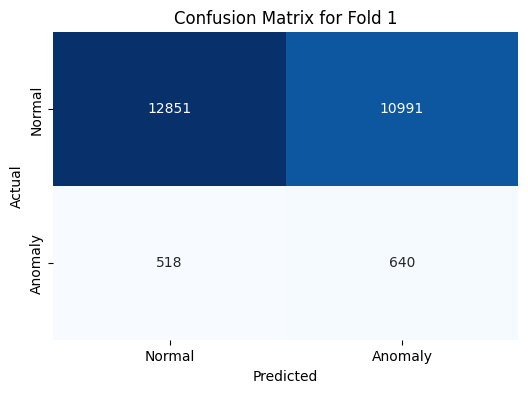

782/782 [==============================] - 10s 13ms/step


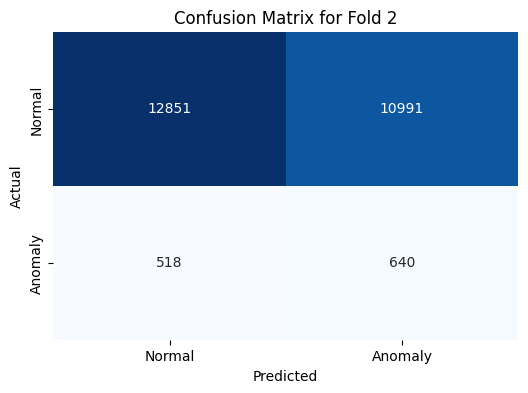

782/782 [==============================] - 10s 13ms/step


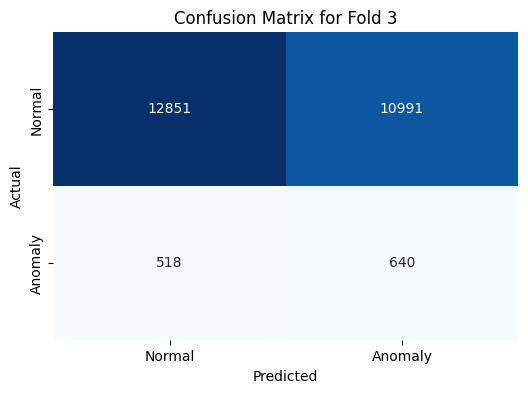

In [ ]:
#Confusion Matrix for Each Fold
from sklearn.metrics import confusion_matrix
import seaborn as sns

for fold in range(n_splits):
    # Generate predictions for test set
    y_pred = (model.predict(X_test_windows[0]) > 0.5).astype("int32")

    # Confusion Matrix
    cm = confusion_matrix(y_test_windows[0], y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Normal", "Anomaly"],
                yticklabels=["Normal", "Anomaly"])
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


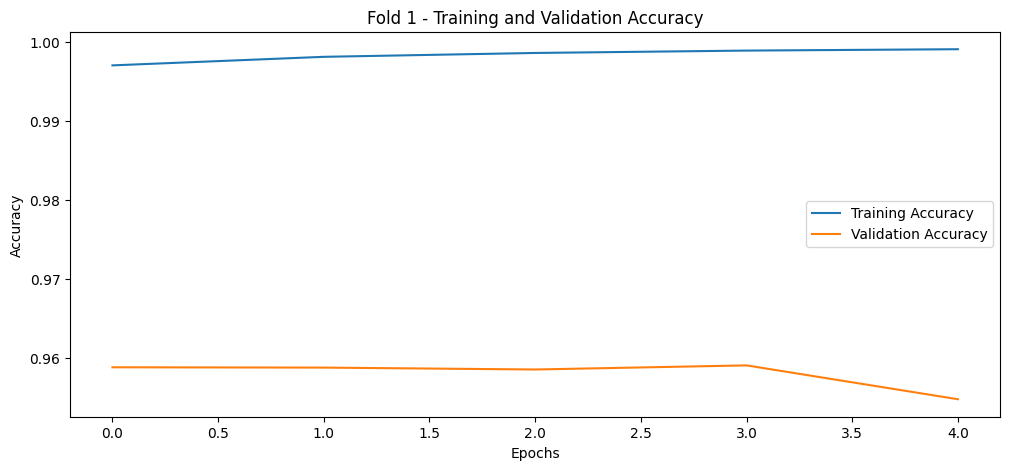

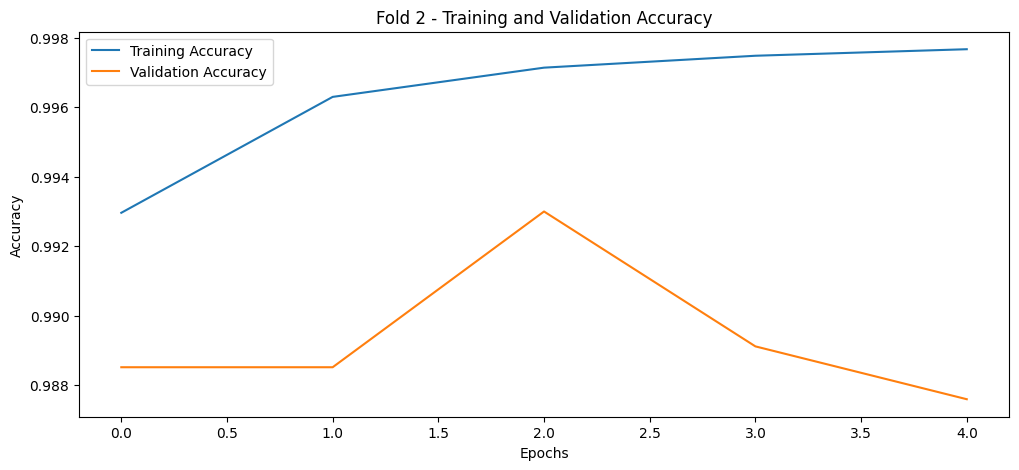

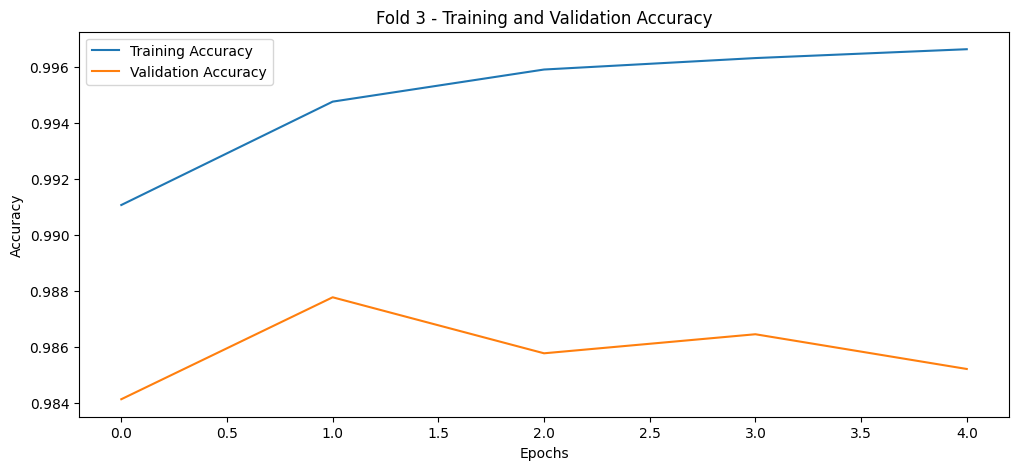

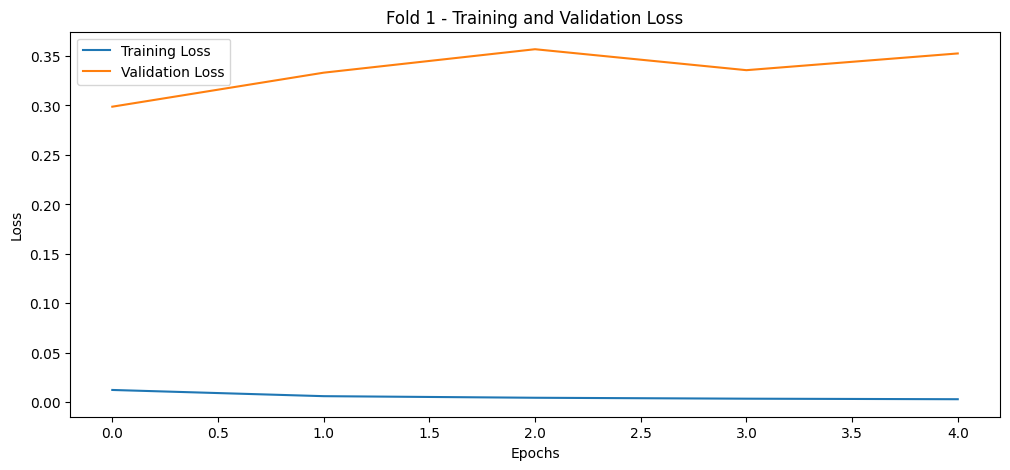

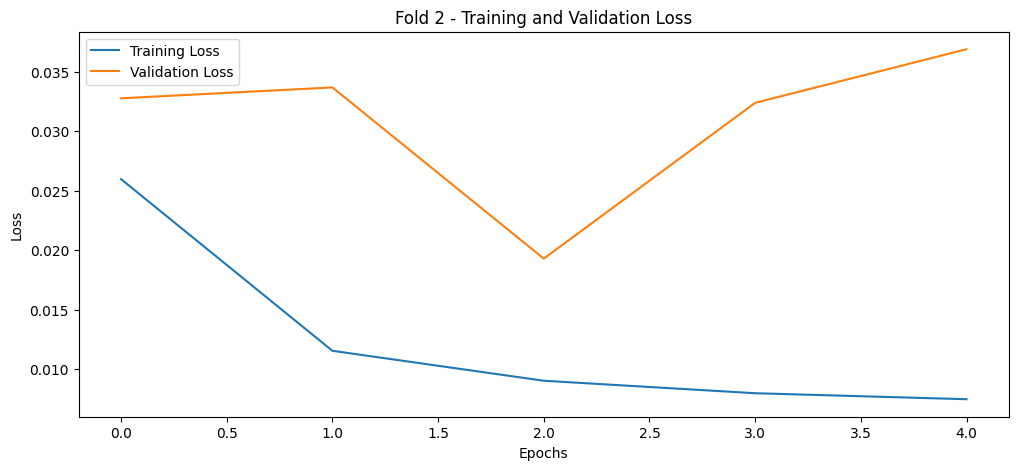

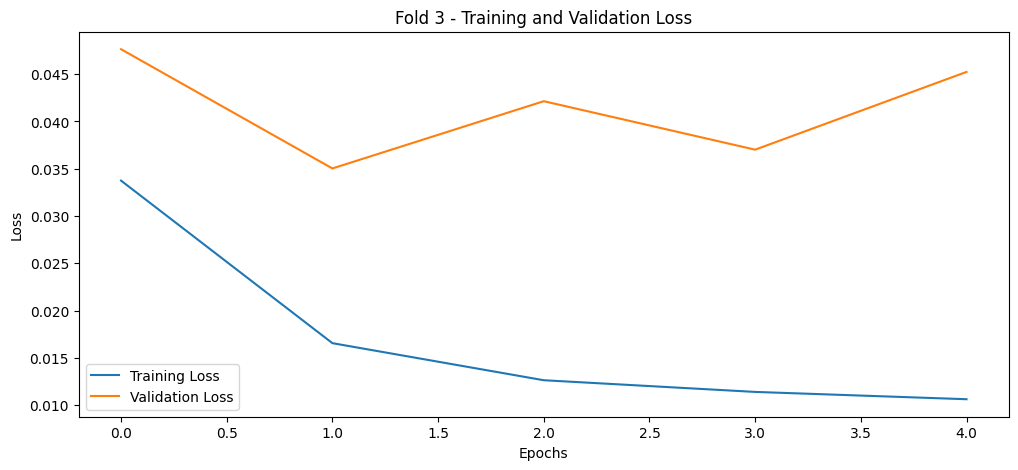

In [ ]:
# Plot training and validation accuracy for each fold
for fold in range(n_splits):
    plt.figure(figsize=(12, 5))
    plt.plot(history_per_fold[fold]['accuracy'], label='Training Accuracy')
    plt.plot(history_per_fold[fold]['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold + 1} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training and validation loss for each fold
for fold in range(n_splits):
    plt.figure(figsize=(12, 5))
    plt.plot(history_per_fold[fold]['loss'], label='Training Loss')
    plt.plot(history_per_fold[fold]['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold + 1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


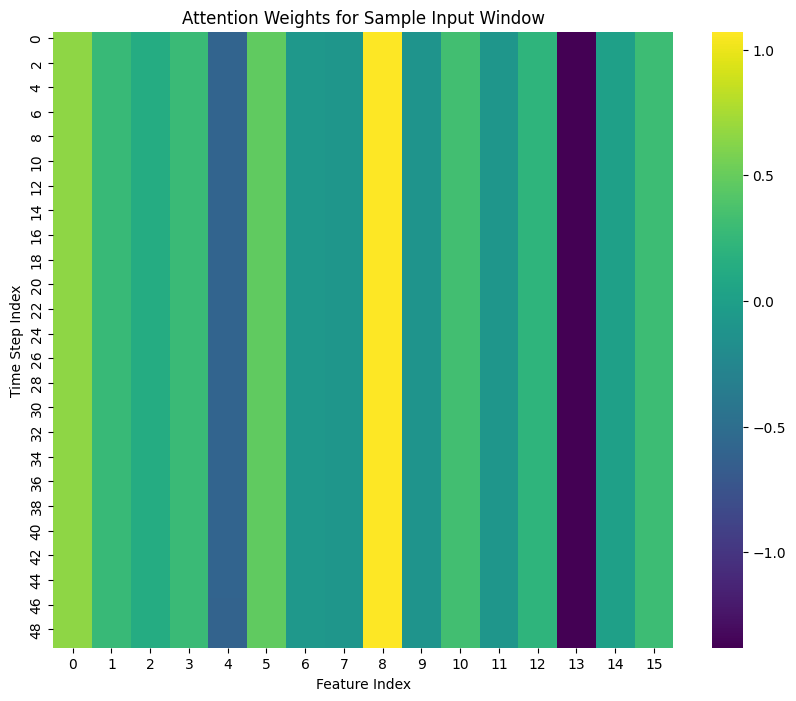

In [ ]:
# Define a sample input window (e.g., from the test set)
sample_input = X_test_windows[0][0:1]  # Select one sample window

# Get attention weights (assuming access to attention layer's output)
attention_layer = model.layers[1]  # MultiHeadAttention layer index
attention_output = tf.keras.backend.function([model.input], [attention_layer.output])
attention_weights = attention_output([sample_input])[0]

# Plot attention weights
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights[0], cmap='viridis', cbar=True)
plt.title("Attention Weights for Sample Input Window")
plt.xlabel("Feature Index")
plt.ylabel("Time Step Index")
plt.show()


Attention Weights Analysis for Sample Input Window

Purpose: This heatmap visualizes the attention weights assigned to each feature across different time steps in a single input window. It illustrates how the model's attention mechanism prioritizes certain features and time steps when making predictions.
Interpretation:
High Attention Regions (yellow areas) indicate that these features and time steps have a significant impact on the model's prediction.
Low Attention Regions (darker colors) suggest that these features and time steps contribute less to the prediction.
Temporal Relevance:
The attention distribution across time steps suggests that the model might focus more on recent events or specific sequences in the time series, which is particularly useful for anomaly detection.
Feature Relevance:
Certain features may receive consistently high attention values, indicating that the model considers them critical for identifying anomalies in this window.
Implication for Anomaly Detection:
By understanding which features and time steps the model emphasizes, we can better interpret the model's decision-making process and potentially gain insights into the characteristics of anomalies in the data.


782/782 [==============================] - 11s 13ms/step


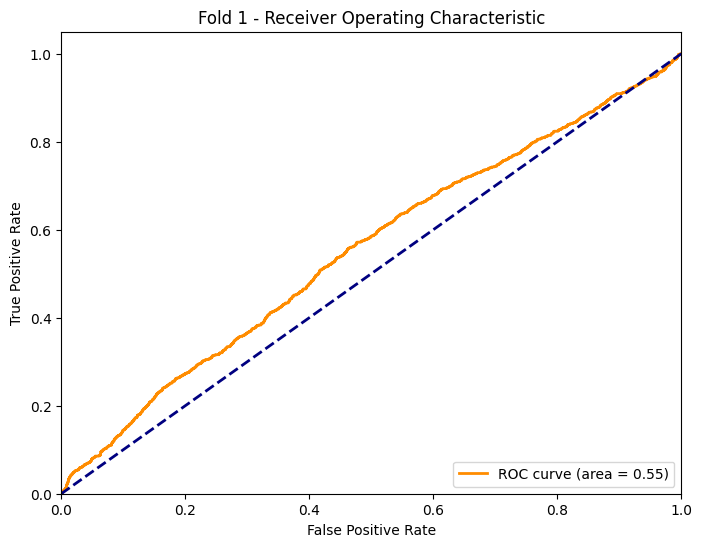

782/782 [==============================] - 10s 13ms/step


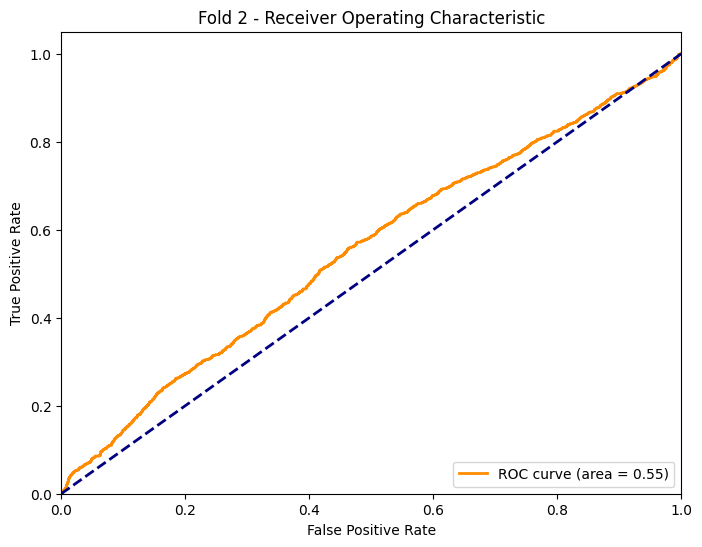

782/782 [==============================] - 10s 13ms/step


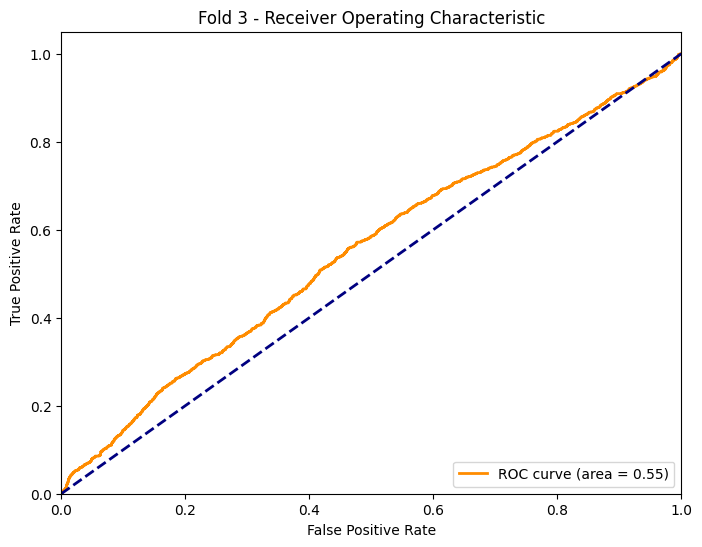

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot AUC-ROC curve for one fold
def plot_auc_roc(y_true, y_pred, fold):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Fold {fold + 1} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Calculate and plot AUC-ROC for each fold
for fold in range(n_splits):
    y_pred_prob = model.predict(X_test_windows[0]).ravel()  # Probabilities for ROC curve
    plot_auc_roc(y_test_windows[0], y_pred_prob, fold)


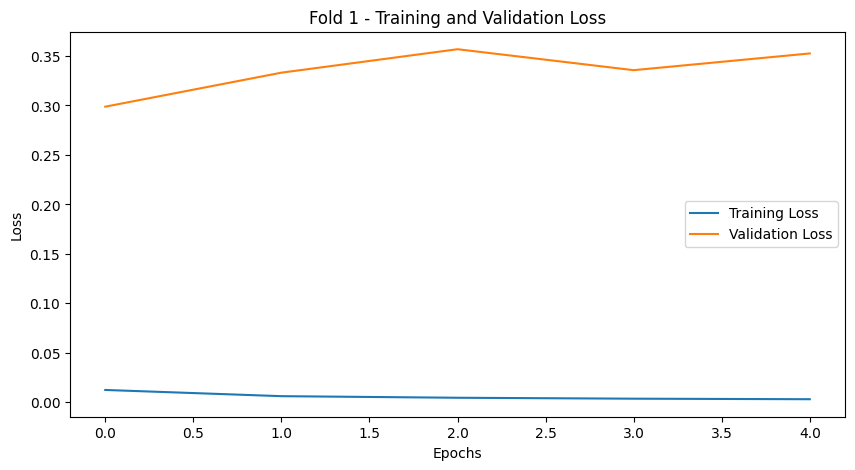

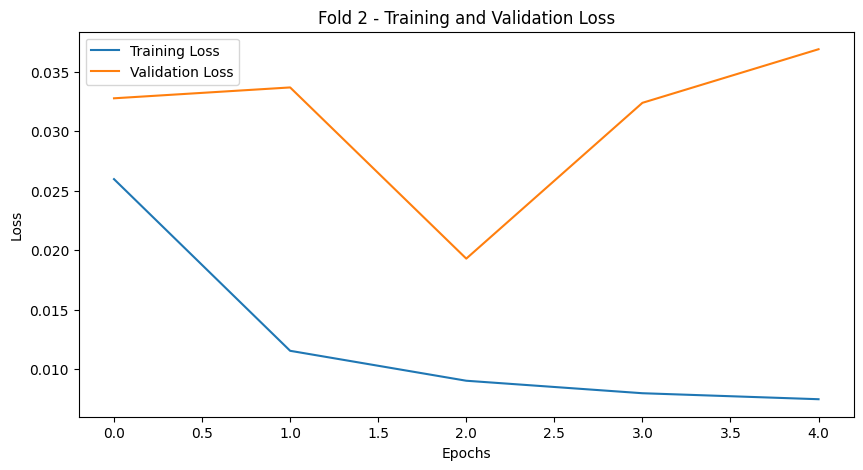

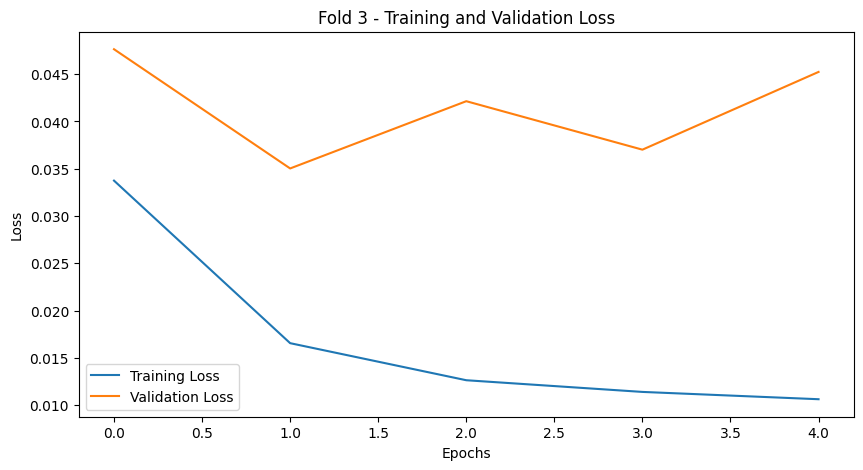

In [ ]:
# Plot training and validation loss for each fold
for fold in range(n_splits):
    plt.figure(figsize=(10, 5))
    plt.plot(history_per_fold[fold]['loss'], label='Training Loss')
    plt.plot(history_per_fold[fold]['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold + 1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


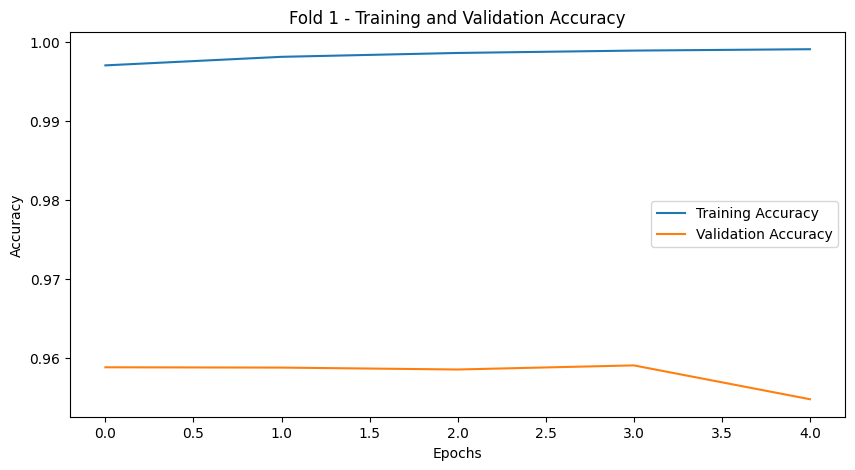

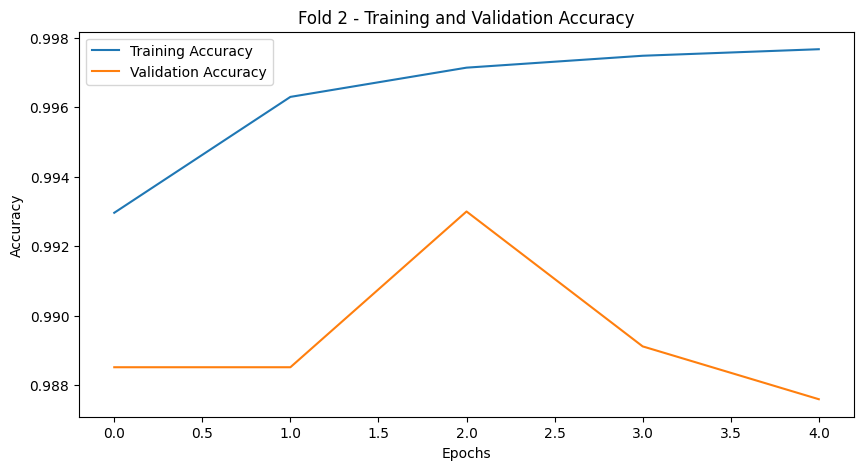

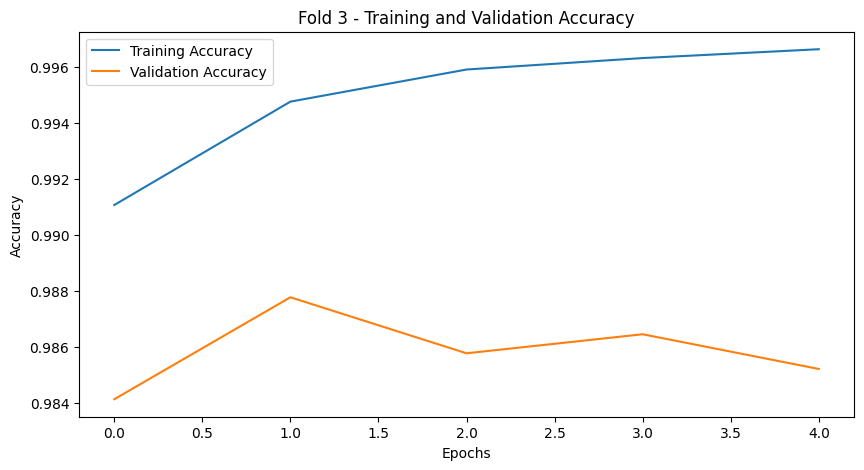

In [ ]:
# Plot training and validation accuracy for each fold
for fold in range(n_splits):
    plt.figure(figsize=(10, 5))
    plt.plot(history_per_fold[fold]['accuracy'], label='Training Accuracy')
    plt.plot(history_per_fold[fold]['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold + 1} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


with 15 Epochs

In [ ]:
# Define hyperparameters
num_epochs = 10
batch_size = 64
n_splits = 3  # Adjust based on your cross-validation setup

# Initialize dictionaries to store results
history_per_fold = {}

# Loop through each fold
for fold in range(n_splits):
    print(f"\n--- Training on Fold {fold + 1}/{n_splits} ---\n")

    # Define input shape and instantiate model
    input_shape = (window_size, X_train_windows[fold].shape[2])
    model = transformer_with_lstm(input_shape)

    # Train the model on the current fold's data
    history = model.fit(
        X_train_windows[fold],           # Training data for the current fold
        y_train_windows[fold],           # Labels for the current fold
        epochs=num_epochs,               # Train for 10 epochs
        batch_size=batch_size,           # Batch size
        validation_data=(X_test_windows[0], y_test_windows[0]),  # Validation on test data
        verbose=1
    )

    # Store training history
    history_per_fold[fold] = history.history

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test_windows[0], y_test_windows[0], verbose=0)
    print(f"\nFold {fold + 1} Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Additional Metrics
    y_pred = (model.predict(X_test_windows[0]) > 0.5).astype("int32")
    test_f1 = f1_score(y_test_windows[0], y_pred)
    test_precision = precision_score(y_test_windows[0], y_pred)
    test_recall = recall_score(y_test_windows[0], y_pred)

    print(f"Fold {fold + 1} Test F1 Score: {test_f1:.4f}")
    print(f"Fold {fold + 1} Test Precision: {test_precision:.4f}")
    print(f"Fold {fold + 1} Test Recall: {test_recall:.4f}")

# At the end of training, `history_per_fold` will store the training and validation loss and accuracy for each fold.



--- Training on Fold 1/3 ---

Epoch 1/10
38468/38468 [==============================] - 1719s 45ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 0.2748 - val_accuracy: 0.9586
Epoch 2/10
38468/38468 [==============================] - 1719s 45ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.3226 - val_accuracy: 0.9598
Epoch 3/10
38468/38468 [==============================] - 1719s 45ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.3397 - val_accuracy: 0.9578
Epoch 4/10
38468/38468 [==============================] - 1715s 45ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.2913 - val_accuracy: 0.9602
Epoch 5/10
38468/38468 [==============================] - 1712s 45ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.3665 - val_accuracy: 0.9578
Epoch 6/10
38468/38468 [==============================] - 1717s 45ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.3746 - val_accuracy: 0.9553
Epoch 7/10
38468/38468 [==============================] - 1716s 45ms/

In [ ]:
# Define hyperparameters
num_epochs = 15
batch_size = 64
n_splits = 3  # Adjust based on your cross-validation setup

# Initialize dictionaries to store results
history_per_fold = {}

# Loop through each fold
for fold in range(n_splits):
    print(f"\n--- Training on Fold {fold + 1}/{n_splits} ---\n")

    # Define input shape and instantiate model
    input_shape = (window_size, X_train_windows[fold].shape[2])
    model = transformer_with_lstm(input_shape)

    # Train the model on the current fold's data
    history = model.fit(
        X_train_windows[fold],           # Training data for the current fold
        y_train_windows[fold],           # Labels for the current fold
        epochs=num_epochs,               # Train for 15 epochs
        batch_size=batch_size,           # Batch size
        validation_data=(X_test_windows[0], y_test_windows[0]),  # Validation on test data
        verbose=1
    )

    # Store training history
    history_per_fold[fold] = history.history

    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(X_test_windows[0], y_test_windows[0], verbose=0)
    print(f"\nFold {fold + 1} Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Additional Metrics
    y_pred = (model.predict(X_test_windows[0]) > 0.5).astype("int32")
    test_f1 = f1_score(y_test_windows[0], y_pred)
    test_precision = precision_score(y_test_windows[0], y_pred)
    test_recall = recall_score(y_test_windows[0], y_pred)

    print(f"Fold {fold + 1} Test F1 Score: {test_f1:.4f}")
    print(f"Fold {fold + 1} Test Precision: {test_precision:.4f}")
    print(f"Fold {fold + 1} Test Recall: {test_recall:.4f}")

# At the end of training, `history_per_fold` will store the training and validation loss and accuracy for each fold.



--- Training on Fold 1/3 ---

Epoch 1/15
38468/38468 [==============================] - 1712s 44ms/step - loss: 0.0126 - accuracy: 0.9970 - val_loss: 0.3192 - val_accuracy: 0.9560
Epoch 2/15
38468/38468 [==============================] - 1712s 44ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.3402 - val_accuracy: 0.9585
Epoch 3/15
38468/38468 [==============================] - 1709s 44ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.3521 - val_accuracy: 0.9586
Epoch 4/15
38468/38468 [==============================] - 1707s 44ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.3988 - val_accuracy: 0.9569
Epoch 5/15
38468/38468 [==============================] - 1707s 44ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.3632 - val_accuracy: 0.9571
Epoch 6/15
38468/38468 [==============================] - 1705s 44ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.4261 - val_accuracy: 0.9558
Epoch 7/15
38468/38468 [==============================] - 1708s 44ms/

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=3,          # Number of epochs with no improvement
    restore_best_weights=True  # Roll back to the best model weights
)


In [ ]:
history = model.fit(
    X_train_windows[fold],
    y_train_windows[fold],
    epochs=15,  # Maximum number of epochs
    batch_size=64,
    validation_data=(X_test_windows[0], y_test_windows[0]),
    callbacks=[early_stopping],  # Add early stopping
    verbose=1
)


Epoch 1/15
11304/38468 [=======>......................] - ETA: 18:48 - loss: 0.0179 - accuracy: 0.9964

In [ ]:
#Confusion Matrix for Each Fold
from sklearn.metrics import confusion_matrix
import seaborn as sns

for fold in range(n_splits):
    # Generate predictions for test set
    y_pred = (model.predict(X_test_windows[0]) > 0.5).astype("int32")

    # Confusion Matrix
    cm = confusion_matrix(y_test_windows[0], y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Normal", "Anomaly"],
                yticklabels=["Normal", "Anomaly"])
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
# Plot training and validation accuracy for each fold
for fold in range(n_splits):
    plt.figure(figsize=(12, 5))
    plt.plot(history_per_fold[fold]['accuracy'], label='Training Accuracy')
    plt.plot(history_per_fold[fold]['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold + 1} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training and validation loss for each fold
for fold in range(n_splits):
    plt.figure(figsize=(12, 5))
    plt.plot(history_per_fold[fold]['loss'], label='Training Loss')
    plt.plot(history_per_fold[fold]['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold + 1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
# Define a sample input window (e.g., from the test set)
sample_input = X_test_windows[0][0:1]  # Select one sample window

# Get attention weights (assuming access to attention layer's output)
attention_layer = model.layers[1]  # MultiHeadAttention layer index
attention_output = tf.keras.backend.function([model.input], [attention_layer.output])
attention_weights = attention_output([sample_input])[0]

# Plot attention weights
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights[0], cmap='viridis', cbar=True)
plt.title("Attention Weights for Sample Input Window")
plt.xlabel("Feature Index")
plt.ylabel("Time Step Index")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot AUC-ROC curve for one fold
def plot_auc_roc(y_true, y_pred, fold):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Fold {fold + 1} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Calculate and plot AUC-ROC for each fold
for fold in range(n_splits):
    y_pred_prob = model.predict(X_test_windows[0]).ravel()  # Probabilities for ROC curve
    plot_auc_roc(y_test_windows[0], y_pred_prob, fold)


In [ ]:
# Plot training and validation loss for each fold
for fold in range(n_splits):
    plt.figure(figsize=(10, 5))
    plt.plot(history_per_fold[fold]['loss'], label='Training Loss')
    plt.plot(history_per_fold[fold]['val_loss'], label='Validation Loss')
    plt.title(f'Fold {fold + 1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
# Plot training and validation accuracy for each fold
for fold in range(n_splits):
    plt.figure(figsize=(10, 5))
    plt.plot(history_per_fold[fold]['accuracy'], label='Training Accuracy')
    plt.plot(history_per_fold[fold]['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {fold + 1} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
